# Assignment submission:
## SESSION: PYTHON 6, 7, 8, 9,10,11 - Student: Ginju Soumya


# Libraries and Modules: Import

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3 as db
from pandasql import sqldf
import sqlparse
import pandasql
import scipy as sp
import seaborn as sns
plt.style.use('ggplot')
plt.style.use('seaborn-white')

### 2.1. Problem Statement: Numpy <br><br>
__Problem Statement 1:__<br><br>
Write a function so that the columns of the output matrix are powers of
the input vector.<br>
The order of the powers is determined by the increasing boolean argument. Specifically, when
increasing is False, the i-th output column is the input vector raised element-wise to the power of N - i - 1.<br>

<br>HINT: Such a matrix with a geometric progression in each row is named for AlexandreTheophile Vandermonde.

__Solution:__

In [183]:
import numpy as np

def ATVMonde(x, n=0, increasing=False):
    """Function to generate the columns of the output matrix are powers of the input vector

    Args:
        x (list or array): Input 1-Dimensional array/list with integers.
        n (int, optional): Number of columns in the output. If N is not specified, default to Zero(0).
        increasing (bool, optional): Order of the powers of the columns. 
            If True, the powers increase from left to right, if False (the default) they are reversed.

    Returns:
        out : ndarray Vandermonde matrix. 
            If increasing is False, the first column is x^(N-1), the second x^(N-2) and so forth. If increasing is True, the columns are x^0, x^1, ..., x^(N-1).

    """
    if n is 0:
        n = len(x)
    List1 = []
    # Loop through each item in input list
    for data in x:
        for i in range(n):
            List1.append(data**(n-1-i))
    matrix = np.array(List1).reshape((len(x),n))
    return matrix

List = [1,2,3,4,5]
matrix =ATVMonde(List,3)
print('AlexandreTheophile Vandermonde matrix with a geometric progression: ')
print(matrix)

AlexandreTheophile Vandermonde matrix with a geometric progression: 
[[ 1  1  1]
 [ 4  2  1]
 [ 9  3  1]
 [16  4  1]
 [25  5  1]]


__Problem Statement 2:__<br><br>
Given a sequence of n values x1, x2, ..., xn and a window size k>0, the k-th moving average
of the given sequence is defined as follows:<br><br>
The moving average sequence has n-k+1 elements as shown below.<br><br>
The moving averages with k=4 of a ten-value sequence (n=10) is shown below.<br><br>
i 1 2 3 4 5 6 7 8 9 10<br>
===== == == == == == == == == == ==<br>
Input 10 20 30 40 50 60 70 80 90 100<br>
y1 25 = (10+20+30+40)/4<br>
y2 35 = (20+30+40+50)/4<br>
y3 45 = (30+40+50+60)/4<br>
y4 55 = (40+50+60+70)/4<br>
y5 65 = (50+60+70+80)/4<br>
y6 75 = (60+70+80+90)/4<br>
y7 85 = (70+80+90+100)/4<br>
Thus, the moving average sequence has n-k+1=10-4+1=7 values.<br><br>
__Question:__ Write a function to find moving average in an array over a window:<br><br>
Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3.

__Solution:__

In [184]:
# moving average function over windows
def mAvg(list1,k):
    """Function to calculate the moving average of the given sequence

    Args:
        list1 (list or array): Input 1-Dimensional array/list numeric sequence.
        k (int): Size of moving window
        
    Returns:
        out : 1darray. 
            Output array with moving average

    """
    length = len(list1)
    x = 0
    sequence = [] # List declaration
    while(x <= (length-k)):
        y = 0
        sum = 0
        while(y < k):
            sum = sum + list1[x+y]
            y = y+1
        element = sum / k
        sequence.append(element) # Appending element to sequence
        x = x+1
    return sequence

seq = [3,5,7,2,8,10,11,65,72,81,99,100,150]
windw = 3 # defining the window size
# Movig average function call.
result = mAvg(seq,windw)
print("Moving average in an array over the window of 3:",result)

Moving average in an array over the window of 3: [5.0, 4.666666666666667, 5.666666666666667, 6.666666666666667, 9.666666666666666, 28.666666666666668, 49.333333333333336, 72.66666666666667, 84.0, 93.33333333333333, 116.33333333333333]


### 2.2. Problem Statement: Pandas

__Problem Statement 1:__<br><br>
1) How-to-count-distance-to-the-previous-zero<br><br>
For each value, count the difference of the distance from the previous zero (or the start
of the Series, whichever is closer) and if there are no previous zeros, print the position.<br><br>
Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}
The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'.<br><br><br>
```import pandas as pd
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})```<br><br>
2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a
Series of random numbers.<br><br>
3) Find the sum of the values in s for every Wednesday<br><br>
4) Average For each calendar month<br><br>
5) For each group of four consecutive calendar months in s, find the date on which the
highest value occurred.

__Solution:__

In [185]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

s = pd.Series([7, 2, 0, 3, 4, 2, 5, 0, 3, 4])
new_series = (s.groupby(s.eq(0).cumsum().mask(s.eq(0))).cumcount() + 1).mask(s.eq(0), 0)

df = pd.concat([df, new_series], axis=1)
df.columns = ['X', 'Y']
print('The count of distance to the previous zero in Column X is specified in Column Y:')
print(df)

The count of distance to the previous zero in Column X is specified in Column Y:
   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers.

In [186]:
index2015 = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(index2015)), index=index2015)
print ('The index of a Series of random numbers in DatetimeIndex that contains each business day of 2015')
print(s)

The index of a Series of random numbers in DatetimeIndex that contains each business day of 2015
2015-01-01    0.599180
2015-01-02    0.987382
2015-01-05    0.486935
2015-01-06    0.093890
2015-01-07    0.291650
2015-01-08    0.222323
2015-01-09    0.622859
2015-01-12    0.974478
2015-01-13    0.605098
2015-01-14    0.256532
2015-01-15    0.004838
2015-01-16    0.366147
2015-01-19    0.741361
2015-01-20    0.065509
2015-01-21    0.926066
2015-01-22    0.441911
2015-01-23    0.378906
2015-01-26    0.861088
2015-01-27    0.349017
2015-01-28    0.558274
2015-01-29    0.024275
2015-01-30    0.905083
2015-02-02    0.485017
2015-02-03    0.197819
2015-02-04    0.494658
2015-02-05    0.962256
2015-02-06    0.711240
2015-02-09    0.408689
2015-02-10    0.565060
2015-02-11    0.020128
                ...   
2015-11-20    0.221888
2015-11-23    0.573221
2015-11-24    0.362977
2015-11-25    0.321912
2015-11-26    0.977195
2015-11-27    0.524519
2015-11-30    0.198997
2015-12-01    0.916137
2015-1

3) Find the sum of the values in s for every Wednesday

In [192]:
print ('The sum of the values in the series for every Wednesdays:')
s[index2015.weekday == 2].sum()

The sum of the values in the series for every Wednesdays:


25.532742897792588

4) Average For each calendar month

In [193]:
print('Average for each calendar month:')
s.resample('M').mean()

Average for each calendar month:


2015-01-31    0.489218
2015-02-28    0.496050
2015-03-31    0.534632
2015-04-30    0.479346
2015-05-31    0.592427
2015-06-30    0.485747
2015-07-31    0.476638
2015-08-31    0.430211
2015-09-30    0.569748
2015-10-31    0.540989
2015-11-30    0.529822
2015-12-31    0.516581
Freq: M, dtype: float64

5) For each group of four consecutive calendar months in s, find the date on which the highest value occurred.

In [194]:
print('The date on which the highest value occurred for each group of four consecutive calendar months in the series:')
s.groupby(pd.Grouper(freq='4M')).idxmax()

The date on which the highest value occurred for each group of four consecutive calendar months in the series:


2015-01-31   2015-01-02
2015-05-31   2015-05-21
2015-09-30   2015-09-09
2016-01-31   2015-11-12
Freq: 4M, dtype: datetime64[ns]

__Problem Statement 2:__<br><br>
Read the dataset from the below link<br><br>
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv
<br><br>__Questions:__<br><br>
1) Delete unnamed columns<br><br>
2) Show the distribution of male and female<br><br>
3) Show the top 5 most preferred names<br><br>
4) What is the median name occurrence in the dataset<br><br>
5) Distribution of male and female born count by states

__Solution:__

In [2]:
#reading the dataset
df2= pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")

In [314]:
df2.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


In [315]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


In [18]:
df2.columns

Index(['Unnamed: 0', 'Id', 'Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

1) Delete unnamed columns

In [316]:
df2.drop(['Unnamed: 0'], axis = 1, inplace = True, errors = 'ignore')#droping the column 'Unnamed'

In [317]:
df2.head(10)

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41
5,11355,Abigail,2004,F,AK,37
6,11356,Olivia,2004,F,AK,33
7,11357,Isabella,2004,F,AK,30
8,11358,Alyssa,2004,F,AK,29
9,11359,Sophia,2004,F,AK,28


2) Show the distribution of male and female

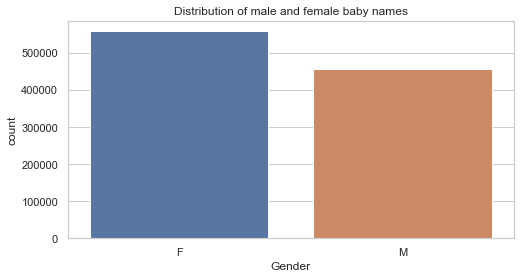

In [33]:
M = df2["Gender"][df2["Gender"] == "M"].count() #finding the count of males
F = df2["Gender"][df2["Gender"] == "F"].count() #finding the count of females
plt.figure(figsize=(8,4)) #fixing the figure sizes
sns.set(style="whitegrid") # assigning a sutable grid
plt.title('Distribution of male and female baby names')#labelling the graph
sns.countplot(x='Gender',data=df2); #labeling x axis and assigning data for count in y axis

In [3]:
M = df2["Gender"][df2["Gender"] == "M"].count()#finding the count of males
F = df2["Gender"][df2["Gender"] == "F"].count()#finding the count of females
print(f"Distribution of male and female baby names in the dataset: {M} Males names, {F} Female names ")

Distribution of male and female baby names in the dataset: 457549 Males names, 558846 Female names 


In [113]:
#also can be checked by:
df2.groupby(['Gender']).count()

,Id,Name,Year,State,Count
Gender,,,,,
F,558846,558846,558846,558846,558846
M,457549,457549,457549,457549,457549


In [114]:
#also can be checked by:
df2['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

3) Show the top 5 most preferred names


In [197]:
print('The top 5 most preferred names:')
df2["Name"].value_counts().head()  # finding the 5 most preffered name according to the value of count column whith highest value on top

The top 5 most preferred names:


Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64


4) What is the median name occurrence in the dataset


In [200]:
df2 = df2.sort_values("Count")
median = int(df2['Id'].median())
x = df2[df2['Id'] == median]['Name']
y = x.tolist()
print('The median name occurrence in the dataset: '+ str(y[0]))
#y[0]

The median name occurrence in the dataset: Kasey


In [16]:
# the count can be found as below:
df2 = df2.sort_values("Count")
df2["Name"].value_counts().median()

8.0


5) Distribution of male and female born count by states

In [37]:
df2.groupby(["Gender","State"]).size()

Gender  State
F       AK        2404
        AL        9878
        AR        7171
        AZ       14518
        CA       45144
        CO       11424
        CT        6575
        DC        3053
        DE        2549
        FL       25781
        GA       19385
        HI        3255
        IA        7131
        ID        4918
        IL       21268
        IN       13056
        KS        7753
        KY        8817
        LA       10510
        MA       10580
        MD       11276
        ME        2976
        MI       16038
        MN       10677
        MO       11948
        MS        7235
        MT        2690
        NC       17357
        ND        2399
        NE        5370
                 ...  
M       ME        2777
        MI       13243
        MN        9004
        MO        9917
        MS        6862
        MT        2986
        NC       13530
        ND        2581
        NE        5029
        NH        2659
        NJ       12274
        NM        49

In [38]:
df2.groupby(["Gender","State"]).size().unstack()# stacked dristribution of male and female per state

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Gender,,,,,,,,,,,,,,,,,,,,,
F,2404,9878,7171,14518,45144,11424,6575,3053,2549,25781,...,2838,13063,39760,9515,14759,1398,13329,10549,4305,1456
M,2587,8419,6475,10820,31637,9183,5733,3000,2440,20070,...,2908,10588,27791,8233,11997,1618,11049,8940,3733,1904


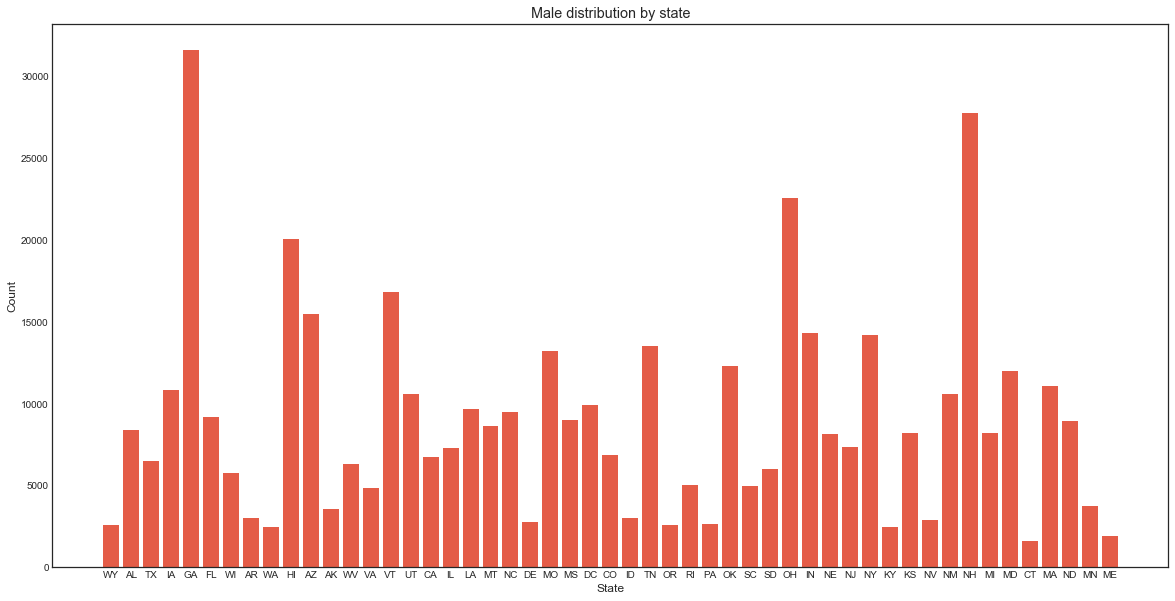

In [22]:
#distribution of male born Count by states
df2_male = df2.loc[df2['Gender'] == 'M']
count_male = df2_male['Count'].groupby(df2_male['State']).count()
states_male = df2['State'].unique()
y_male = np.arange(len(states_male))
plt.figure(figsize=(20,10))
performance_male = count_male
plt.bar(y_male,performance_male,align='center',alpha=0.9)
plt.xticks(y_male,states_male)
plt.ylabel('Count')
plt.xlabel('State')
plt.title('Male distribution by state')
plt.show()

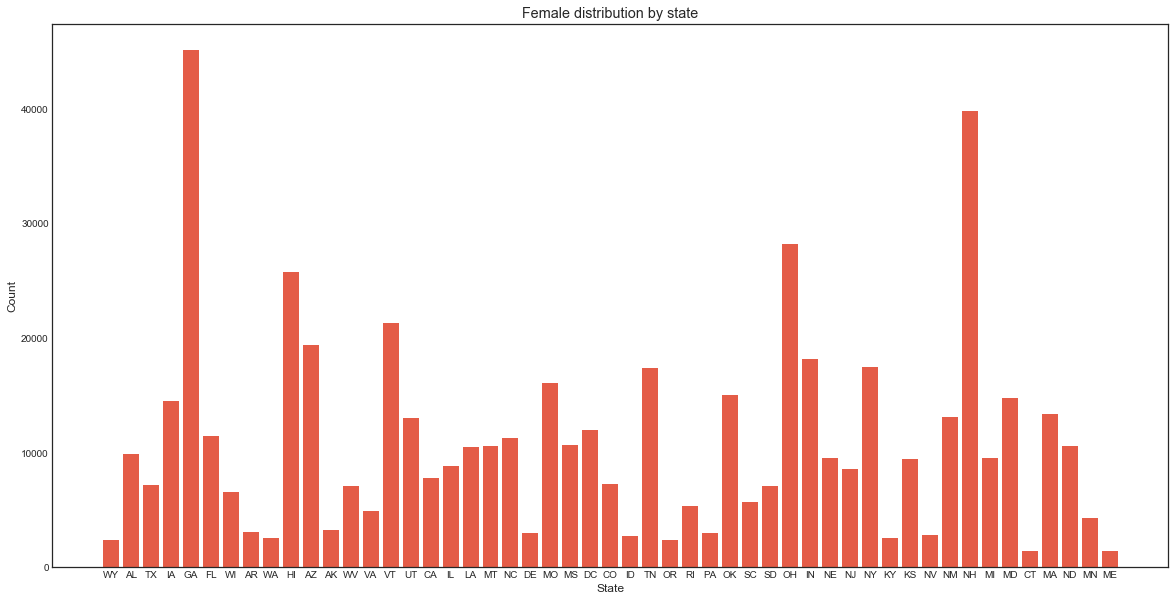

In [23]:
#distribution of female born Count by states
df2_female = df2.loc[df2['Gender'] == 'F']
count_female = df2_female['Count'].groupby(df2_female['State']).count()
states_female = df2['State'].unique()
y_female = np.arange(len(states_female))
plt.figure(figsize=(20,10))
performance_female = count_female
plt.bar(y_female,performance_female,align='center',alpha=0.9)
plt.xticks(y_female,states_female)
plt.ylabel('Count')
plt.xlabel('State')
plt.title('Female distribution by state')
plt.show()

### 2.3. Problem Statement: Use Cases on Numpy and Pandas

 __1.__ Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception handling using try-catch which gives the output as:<br><br>
Output:<br><br>
1) If the List element is an alphabet or string, the output will be:<br><br>
 ```The entry is a```<br>
```Oops! <class 'ValueError'> occured.```<br>
```Next entry.```<br><br>
2) If the List element is “0”,the output will be<br><br>
```The entry is 0```<br>
```Oops! <class 'ZeroDivisionError'> occured.```<br>
```Next entry.```<br><br>
3) If the List element is and integer except 0,then output will be:<br><br>
```The entry is 2```<br>
```The reciprocal of 2 is 0.5 // reciprocal of an integer```<br>


__Solution:__

In [27]:
# importing  module sys to get the type of exception
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!",sys.exc_info()[0],"occured.")
        print("Next entry.")
        print()
print("The reciprocal of",entry,"is",r,"// reciprocal of an integer")

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5 // reciprocal of an integer


__2. Array out of Bound Exception:__<br><br>
Write a Python program to give exception “Array Out of Bound” if the user wants to access the
elements beyond the list size (use try and except)<br>


__Solution:__

In [42]:
try:
   l = [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]
   print(l[10])
except:
   print('Array Out of Bounds')

Array Out of Bounds


__3.__ Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py.<br><br>
_Note : The module created as fibo.py has to be placed in lib folder_<br><br>
_For linux/ubuntu path = /home/anaconda/lib/python3_<br>
_For Windows path = C:\Users\Ajit\Anaconda3\Lib_<br>


In [ ]:
#def fib(n):    # write Fibonacci series up to n
    #a, b = 0, 1
    #while a < n:
        #print (a),
        #a, b = b, a+b

#def fib2(n):   # return Fibonacci series up to n
    #result = []
    #a, b = 0, 1
    #while a < n:
        #result.append(a)
        #a, b = b, a+b
    #return result

In [39]:
import fibo

In [41]:
fibo.fib2(1000)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

4) Write a python module script that contains ispalindrome() method to calculate the input
string as palindrome string or not and save it as palindrome.py.


__Solution:__

In [ ]:
#def ispalindrome(str):    # check input string is palindrome 
    #return str == ''.join(reversed(str))

In [43]:
import palindrome

In [11]:
str="malayalam"
print(palindrome.ispalindrome(str))

True


In [45]:
str="GinjuSoumya"
print(palindrome.ispalindrome(str))

False


__5.__Write a program in Python with one class called __Cipher__.<br><br>
Within the constructor of this class, ask user for a string and store it. Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive.<br> 
Implement two methods, __encrypt__ and __decrypt__ within this class.<br>

 - Encrypt generates and prints a cipher text using the user-entered string and the key and ecrypt generates decrypted string from ciphertext.<br> 
 - The cipher only encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted.
 - The cipher text can have special characters.<br> 

Use generator expression to filter out alpha and numeric characters of the input string and to generate cipher text.<br> 
Create an instance of this class, encrypt and decrypt back the user entered string.<br>



__Solution:__

In [71]:
import re
import numpy as np

class Cipher:
    inputText = ""
    key = 0

    def __init__(self, Text, Key):
        # body of the constructor
        self.inputText = Text
        self.key = Key

    def encrypt(self):
        encryptedStr = ""

        inputArr=re.split('(\d+)', self.inputText)
     

        for i in range(len(inputArr)):
            element = inputArr[i]
           

            for i in range(len(element)):
                char = element[i]
               

                # Encrypt uppercase characters
                if (char.isupper()):
                    encryptedStr += chr((ord(char) + self.key-65) % 26 + 65)
                # Encrypt lowercase characters
                elif (char.islower()):
                    encryptedStr += chr((ord(char) + self.key-97) % 26 + 97)
                # Encrypt numeric characters
                elif (char.isdigit()):
                    encryptedStr += chr((ord(char) + self.key-48) % 10 + 48)
                # Do not Encrypt other chars
                else:
                    encryptedStr += char

        return encryptedStr


    def decrypt(self, encryptedStr):
        decryptedStr = ""

        inputArr=re.split('(\d+)', encryptedStr)
 

        # traverse text
        for i in range(len(inputArr)):
            element = inputArr[i]
        

            for i in range(len(element)):
                char = element[i]
           
                # Decrypt uppercase characters
                if (char.isupper()):
                    decryptedStr += chr((ord(char) - self.key-65) % 26 + 65)
                # Decrypt lowercase characters
                elif (char.islower()):
                    decryptedStr += chr((ord(char) - self.key-97) % 26 + 97)
                # Decrypt numeric characters
                elif (char.isdigit()):
                    decryptedStr += chr((ord(char) - self.key-48) % 10 + 48)
                # Do not Decrypt other chars
                else:
                    decryptedStr += char

        return decryptedStr



ip = input('Enter a string for Encryption: ')
key = np.random.randint(1,51)
obj = Cipher(ip, key)

#Encrypted as: 
encrypted = obj.encrypt()
print('Encrypted ' + str(encrypted))

#Decrpyted as:
decrypted = obj.decrypt(encrypted)
print('Decrypted ' + str(decrypted))

Enter a string for Encryption: Ginju.08$
Encrypted Dfkgr.31$
Decrypted Ginju.08$



__6.__ Get Data from the following link:<br><br>
http://files.grouplens.org/datasets/movielens/ml-20m.zip <br><br>
We will be using the following files for this exercise:<br><br>
__ratings.csv : userId,movieId,rating, timestamp<br>
tags.csv : userId,movieId, tag, timestamp<br>
movies.csv : movieId, title, genres__<br><br>
I. Read the dataset using pandas.<br><br>
II. Extract the first row from tags and print its type.<br><br>
III. Extract row 0, 11, 2000 from tags DataFrame.<br><br>
IV. Print index, columns of the DataFrame.<br><br>
V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify
using describe().<br><br>
VI. Filter out ratings with rating > 5<br><br>
VII. Find how many null values, missing values are present. Deal with them. Print out how many
rows have been modified.<br><br>
VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.<br><br>
IX. Find the average rating of movies.<br><br>
X. Perform an inner join of movies and tags based on movieId.<br><br>
XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.<br><br>
XII. Split 'genres' into multiple columns.<br><br>
XIII. Extract year from title e.g. (1995).<br><br>
XIV. Select rows based on timestamps later than 2015-02-01.<br><br>
XV. Sort the tags DataFrame based on timestamp.<br><br>


__Solution:__

In [230]:
import pandas as pd
import zipfile
from zipfile import ZipFile

In [240]:
import pandas as pd

In [5]:
#accessing and extracting the datasets to my computer
import zipfile, urllib.request, shutil

url = 'http://files.grouplens.org/datasets/movielens/ml-20m.zip'
file_name = 'myzip.zip'

with urllib.request.urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    with zipfile.ZipFile(file_name) as zf:
        zf.extractall('E:/extract')

I. Read the dataset using pandas.

In [203]:
dfa = pd.read_csv('E:/extract/ml-20m/ratings.csv')#reading rating dataset
dfa.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [218]:
dfb = pd.read_csv('E:/extract/ml-20m/tags.csv')#reading tag dataset
dfb.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [219]:
dfc = pd.read_csv('E:/extract/ml-20m/movies.csv') #reading movies dataset
dfc.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


II. Extract the first row from tags and print its type.

In [30]:
firstrow_dfb=dfb.iloc[0]
firstrow_dfb

userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object

In [33]:
print(dfb.iloc[0])

userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object


In [42]:
x = type(dfb.iloc[0]) #type of first row
x

pandas.core.series.Series

In [37]:
dfb.dtypes# the detailed datatype is:

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [43]:
dfb.dtypes#also can be found by:

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

III. Extract row 0, 11, 2000 from tags DataFrame.

In [138]:
tag_extract = dfb.iloc[[0, 11, 2000]]#extracting 0,11,200 rows from the tag dataset
tag_extract

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


# IV. Print index, columns of the DataFrame.

In [44]:
#Print index of dataframe tag (dfb)
print(dfb.index) 

RangeIndex(start=0, stop=465564, step=1)


In [45]:
#Print coloums of dataframe tag (dfb)
print(dfb.columns) 

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


# V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().

In [115]:
import numpy as np
from pandas import DataFrame as df
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean

In [207]:
#count
print('Count: ' + str(len(dfa.index)))

Count: 20000263


In [210]:
#mean
print('Mean of rating dataset: ')
dfa.mean()

Mean of rating dataset: 


userId       6.904587e+04
movieId      9.041567e+03
rating       3.525529e+00
timestamp    1.100918e+09
dtype: float64

In [211]:
#std
print('Standard Deviation of rating dataset: ')
dfa.std()

Standard Deviation of rating dataset: 


userId       4.003863e+04
movieId      1.978948e+04
rating       1.051989e+00
timestamp    1.621694e+08
dtype: float64

In [213]:
#min
print('Min Max value of the rating dataset: ')
dfa.agg([min, max])

Min Max value of the rating dataset: 


,userId,movieId,rating,timestamp
min,1,1,0.5,789652004
max,138493,131262,5.0,1427784002


In [214]:
#25% (quantile), #50% (quantile) Median, #75% (quantile)
print('25% (quantile), 50% (quantile) Median, 75% (quantile) of the rating dataset: ')
dfa.quantile([.25, .5, .75], axis = 0) 

25% (quantile), 50% (quantile) Median, 75% (quantile) of the rating dataset: 


,userId,movieId,rating,timestamp
0.25,34395.0,902.0,3.0,9.667977e+08
0.50,69141.0,2167.0,3.5,1.103556e+09
0.75,103637.0,4770.0,4.0,1.225642e+09


In [116]:
dfa.describe()#cross checking the individual values found with the descriptive statistics of the ratings dataset

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


# VI. Filter out ratings with rating > 5

In [46]:
dfa[dfa["rating"] > 5] # no movie is rated >5

,userId,movieId,rating,timestamp


In [48]:
dfa[dfa["rating"] >= 5] #since  no movie is rated above 5, producting >=5 rating of movies

,userId,movieId,rating,timestamp
131,1,4993,5.0,1112484682
142,1,5952,5.0,1112484619
158,1,7153,5.0,1112484633
170,1,8507,5.0,1094786027
176,2,62,5.0,974820598
177,2,70,5.0,974820691
180,2,260,5.0,974821014
181,2,266,5.0,974820748
183,2,480,5.0,974820720
184,2,541,5.0,974821014


# VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified.

In [30]:
#null values/missing values in rating dataset
dfa.isnull().sum(axis = 0)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [31]:
dfa.isnull().values.any() #confirming no null value in rating dataset

False

In [219]:
#null values/missing values in movies dataset
dfc.isnull().sum(axis = 0)

movieId    0
title      0
genres     0
dtype: int64

In [32]:
dfc.isnull().values.any() #confirming no null value in movie dataset

False

In [192]:
#null values/missing values in tag dataset- 16 missing values
dfb.isnull().sum(axis = 0)

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [193]:
dfb.isnull().values.any() #confirming null values in tag dataset

True

In [195]:
#null values/missing values in tag dataset- 16 missing values, confirming it
dfb.isnull().sum().sum()

16

In [212]:
#Listing 16 rows with null values/missing values in tag dataset
dfb1 = dfb[dfb.isna().any(axis=1)]
dfb1

,userId,movieId,tag,timestamp
373276,116460,123,NaN,1199450867
373277,116460,346,NaN,1199451946
373281,116460,1184,NaN,1199452261
373288,116460,1785,NaN,1199452006
373289,116460,2194,NaN,1199450677
373291,116460,2691,NaN,1199451002
373299,116460,4103,NaN,1199451920
373301,116460,4473,NaN,1199451040
373303,116460,4616,NaN,1199452441
373319,116460,7624,NaN,1199452266


In [213]:
#16 rows are with null values/missing values in tag dataset is fixed . the missing value (NaN) in tag coloum is changed to "No tag"
dfb1["tag"].fillna("No tag", inplace = True) 
dfb1

,userId,movieId,tag,timestamp
373276,116460,123,No tag,1199450867
373277,116460,346,No tag,1199451946
373281,116460,1184,No tag,1199452261
373288,116460,1785,No tag,1199452006
373289,116460,2194,No tag,1199450677
373291,116460,2691,No tag,1199451002
373299,116460,4103,No tag,1199451920
373301,116460,4473,No tag,1199451040
373303,116460,4616,No tag,1199452441
373319,116460,7624,No tag,1199452266


In [214]:
dfb1.isnull().sum(axis = 0)

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [215]:
dfb1.isnull().values.any()

False

# VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.

In [220]:
dfc.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [222]:
dfc[(dfc['genres']  == 'Animation')] # list of the movies which has genres as only animation

,movieId,title,genres
2503,2588,Cloudland (1998),Animation
4906,5002,Fritz the Cat (1972),Animation
4907,5003,"Nine Lives of Fritz the Cat, The (1974)",Animation
9455,27738,"Cathedral, The (Katedra) (2002)",Animation
9989,32840,Vincent (1982),Animation
13444,66335,Afro Samurai: Resurrection (2009),Animation
13858,69469,Garfield's Pet Force (2009),Animation
14184,71158,Immigrants (L.A. Dolce Vita) (2008),Animation
14492,72603,Merry Madagascar (2009),Animation
14578,72927,Donkey Xote (2007),Animation


In [226]:
dfc[dfc['genres'].str.contains("Animation")]  # list of all movies genres contains animation

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children
310,313,"Swan Princess, The (1994)",Animation|Children
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
388,392,"Secret Adventures of Tom Thumb, The (1993)",Adventure|Animation
547,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
553,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy


# IX. Find the average rating of movies.

In [82]:
dfa.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [217]:
print ('Average rating of movies:')
dfa.rating.mean()

Average rating of movies:


3.5255285642993797

In [50]:
dfa.describe()# double confirming the mean for correctness

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00,1.100918e+09
std,4.003863e+04,1.978948e+04,1.051989e+00,1.621694e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,3.439500e+04,9.020000e+02,3.000000e+00,9.667977e+08
50%,6.914100e+04,2.167000e+03,3.500000e+00,1.103556e+09
75%,1.036370e+05,4.770000e+03,4.000000e+00,1.225642e+09
max,1.384930e+05,1.312620e+05,5.000000e+00,1.427784e+09


# X. Perform an inner join of movies and tags based on movieId.

In [239]:
dfb.head(10) # view tag dataset

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
5,65,668,bollywood,1368149876
6,65,898,screwball comedy,1368150160
7,65,1248,noir thriller,1368149983
8,65,1391,mars,1368150055
9,65,1617,neo-noir,1368150217


In [240]:
dfc.head(10) # view movie dataset

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [243]:
#inner join of movies and tags based on movieId
print (pd.merge(dfc, dfb, on='movieId', how='inner'))

        movieId                                          title  \
0             1                               Toy Story (1995)   
1             1                               Toy Story (1995)   
2             1                               Toy Story (1995)   
3             1                               Toy Story (1995)   
4             1                               Toy Story (1995)   
5             1                               Toy Story (1995)   
6             1                               Toy Story (1995)   
7             1                               Toy Story (1995)   
8             1                               Toy Story (1995)   
9             1                               Toy Story (1995)   
10            1                               Toy Story (1995)   
11            1                               Toy Story (1995)   
12            1                               Toy Story (1995)   
13            1                               Toy Story (1995)   
14        

# XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.

In [53]:
dfmr1=pd.merge(dfc,dfa , on="movieId", how="inner") # joining movie +rating
dfmr1.head() 

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


In [71]:
#movies with genres as comedy and no duplicates with rating greater than 4
comedy1=dfmr1[["title","genres", "rating"]][(dfmr1["genres"] == "Comedy") & (dfmr1["rating"] > 4)]
comedy1.drop_duplicates().head(5)

,title,genres,rating
87435,Father of the Bride Part II (1995),Comedy,5.0
87639,Father of the Bride Part II (1995),Comedy,4.5
241291,Four Rooms (1995),Comedy,5.0
241297,Four Rooms (1995),Comedy,4.5
246558,Ace Ventura: When Nature Calls (1995),Comedy,5.0


In [69]:
# list of all movies genres contains comedy with rating greater than 4 and no duplicates
comedy2=dfmr1[dfmr1["genres"].str.contains("Comedy") & (dfmr1["rating"] > 4)]
comedy2.drop_duplicates().head(5)

,movieId,title,genres,userId,rating,timestamp
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5,1225311239
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0,855176628
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,5.0,846509445


# XII. Split 'genres' into multiple columns.

In [251]:
dfc.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [254]:
dfc_split = dfc.join(dfc['genres'].str.split('|', expand=True).add_prefix('genres').fillna(np.nan))
print (dfc_split)

       movieId                                              title  \
0            1                                   Toy Story (1995)   
1            2                                     Jumanji (1995)   
2            3                            Grumpier Old Men (1995)   
3            4                           Waiting to Exhale (1995)   
4            5                 Father of the Bride Part II (1995)   
5            6                                        Heat (1995)   
6            7                                     Sabrina (1995)   
7            8                                Tom and Huck (1995)   
8            9                                Sudden Death (1995)   
9           10                                   GoldenEye (1995)   
10          11                     American President, The (1995)   
11          12                 Dracula: Dead and Loving It (1995)   
12          13                                       Balto (1995)   
13          14                    

In [255]:
dfc_split.head(10)

,movieId,title,genres,genres0,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,Animation,Children,Comedy,Fantasy,NaN,NaN,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure,Children,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy,Drama,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Heat (1995),Action|Crime|Thriller,Action,Crime,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Sabrina (1995),Comedy|Romance,Comedy,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Tom and Huck (1995),Adventure|Children,Adventure,Children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Sudden Death (1995),Action,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,GoldenEye (1995),Action|Adventure|Thriller,Action,Adventure,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# XIII. Extract year from title e.g. (1995).

In [256]:
dfc.head(10)# movies dataset

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [88]:
#Use regex for just one row per question
import re
year = re.findall("(\(\d{4}\))", dfc["title"].iloc[1])
year


['(1995)']

In [87]:
dfc['year'] = dfc['title'].str[-6:] #spliting the year in the format for the entire dataframe
dfc.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,2,Jumanji (1995),Adventure|Children|Fantasy,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
4,5,Father of the Bride Part II (1995),Comedy,(1995)


# XIV. Select rows based on timestamps later than 2015-02-01.

In [288]:
dfa.head(20) # rating dataset

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
5,1,112,3.5,1094785740
6,1,151,4.0,1094785734
7,1,223,4.0,1112485573
8,1,253,4.0,1112484940
9,1,260,4.0,1112484826


In [72]:
dfa["timestamp"] = pd.to_datetime(dfa["timestamp"], unit='s')  # timestamp convereted to datetime in the rating dataset
dfa[dfa["timestamp"] > pd.Timestamp(str(20150201))].head() #rows selected based on timestamps later than 2015-02-01 in the rating dataset

,userId,movieId,rating,timestamp
3534,31,1,3.0,2015-02-23 23:18:07
3535,31,110,5.0,2015-02-23 23:17:53
3536,31,260,5.0,2015-02-23 23:17:13
3537,31,364,3.0,2015-02-25 06:13:27
3538,31,527,0.5,2015-02-23 23:19:58


# XV. Sort the tags DataFrame based on timestamp.

In [88]:
dfb.head(10) # tag dataset

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
5,65,668,bollywood,1368149876
6,65,898,screwball comedy,1368150160
7,65,1248,noir thriller,1368149983
8,65,1391,mars,1368150055
9,65,1617,neo-noir,1368150217


In [90]:
dfb.sort_values(by='timestamp').head(5)#sotrted tag dataset on timestamp in the tag dataset

,userId,movieId,tag,timestamp
333932,100371,2788,monty python,1135429210
333927,100371,1732,coen brothers,1135429236
333924,100371,1206,stanley kubrick,1135429248
333923,100371,1193,jack nicholson,1135429371
333939,100371,5004,peter sellers,1135429399


In [91]:
dfb["timestamp"] = pd.to_datetime(dfb["timestamp"], unit='s') # sotrted tag dataset on timestamp convereted to datetime  in the tag dataset
dfb.sort_values(by = ["timestamp"]).head(5)

,userId,movieId,tag,timestamp
333932,100371,2788,monty python,2005-12-24 13:00:10
333927,100371,1732,coen brothers,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,2005-12-24 13:02:51
333939,100371,5004,peter sellers,2005-12-24 13:03:19


### 2.4. Problem Statement: Matplotlib

__Matplotlib:__ <br><br>
This assignment is for visualization using matplotlib:<br><br>
__data to use:__<br><br>
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv <br><br>
```titanic = pd.read_csv(url)``` <br><br>
__Charts to plot:__<br><br>
1. Create a pie chart presenting the male/female proportion<br>
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender<br>


__Solution:__

In [220]:
#reading the data
url= ('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic = pd.read_csv(url) 
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


1. Create a pie chart presenting the male/female proportion

In [221]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.pyplot import pie, axis, show
matplotlib.use('nbagg')
from matplotlib import cm
import seaborn as sns

In [11]:
sex_ratio = titanic.groupby('sex').count() #finding the count/ratio/proportin of female and male
sex_ratio

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
sex,,,,,,,,,,,,,
female,466,466,466,388,466,466,466,466,141,464,319,8,288
male,843,843,843,658,843,843,843,842,154,843,167,113,457


In [12]:
print(titanic.sex.value_counts())

male      843
female    466
Name: sex, dtype: int64


<IPython.core.display.Javascript object>


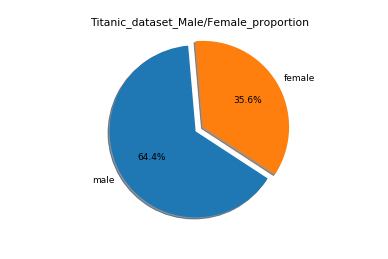

In [222]:
labels = 'male', 'female' #labelling the pies
sizes = [843, 466] #fixing the size of it

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=95, explode=[0,0.1])#defining each attributes
ax.axis('equal')#fixing the axis
plt.title('Titanic_dataset_Male/Female_proportion')#labelling the pie chart
plt.show()#priniting the pie chart

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [179]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [22]:
titanic.shape

(1310, 14)

<IPython.core.display.Javascript object>


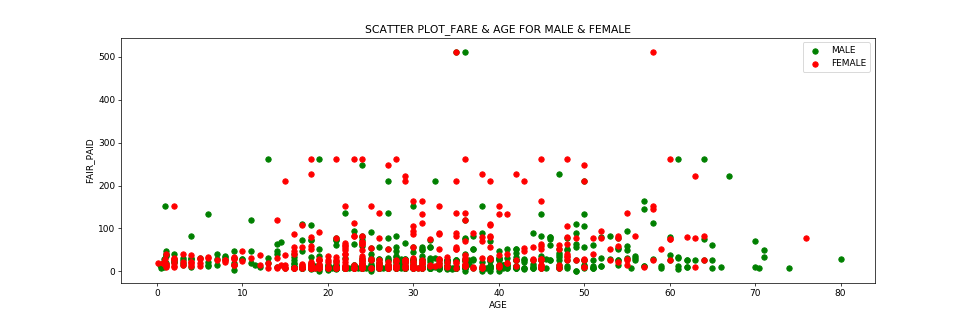

In [223]:
df = titanic.dropna(subset=['age','fare'])#subsetting and dropping na in it
fairpaid_by_male = df[df['sex'] == 'male']['fare']#calculating the fare paid by male
age_male = df[df['sex'] == 'male']['age']#calculating the age of male
fairpaid_by_female = df[df['sex'] == 'female']['fare'] #calculating the fare paid by female
age_female = df[df['sex'] == 'female']['age']#calculating the age of female
plt.figure(figsize=(15,5))#setting the size of the plot
plt.scatter(age_male,fairpaid_by_male,color = "g",label="MALE")#assigning colour g=green
plt.scatter(age_female,fairpaid_by_female,color = "r",label="FEMALE")#assigning colour r=red
plt.xlabel("AGE")#labelling x axis
plt.ylabel("FAIR_PAID")#labelling y axis
plt.title("SCATTER PLOT_FARE & AGE FOR MALE & FEMALE")# labelling the scatter plot
plt.legend() #adding legend
plt.show() #priniting the scatter plot

### 2.5. Problem Statement: Data Cleaning

It happens all the time: someone gives you data containing malformed strings, Python, lists
and missing data. How do you tidy it up so you can get on with the analysis?<br><br>
Take this monstrosity as the DataFrame to use in the following puzzles:<br><br>

```df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})``` <br><br>

1. Some values in the the FlightNumber column are missing. These numbers are meant to
increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
numbers and make the column an integer column (instead of a float column).<br><br>
2. The From_To column would be better as two separate columns! Split each string on the
underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
correct column names to this temporary DataFrame.<br><br>
3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become
"London".)<br><br>
4. Delete the From_To column from df and attach the temporary DataFrame from the previous
questions.<br><br>
5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
would like each first value in its own column, each second value in its own column, and so on. If
there isn't an Nth value, the value should be NaN.
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
delay_2, etc. and replace the unwanted RecentDelays column in df with delays.



In [29]:
df1 = pd.DataFrame({
    'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],
    'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 
    'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
    'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']}) 


In [30]:
df1

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [79]:
type(df1)

pandas.core.frame.DataFrame

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
From_To         5 non-null object
FlightNumber    3 non-null float64
RecentDelays    5 non-null object
Airline         5 non-null object
dtypes: float64(1), object(3)
memory usage: 140.0+ bytes


1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [111]:
#for loop for increase by 10 with each row so 10055 and 10075 to be put in place
for i in range(df1['From_To'].count()):#Fill in these missing numbers
    if(np.isnan(df1['FlightNumber'][i])):
        df1['FlightNumber'][i] = ((df1['FlightNumber'][0])+(10*i))
    else:
        next
df1['FlightNumber'] = df1['FlightNumber'].astype('int64') #making the column an integer column 
df1

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [29]:
#also can be solved by:
#df1['FlightNumber'] = df1['FlightNumber'].interpolate().astype(int)
#df1.FlightNumber

0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int32

2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [112]:
df1_temp = pd.DataFrame()
df1_temp['From'] = df1['From_To'].str.split('_').str[0]
df1_temp['To'] = df1['From_To'].str.split('_').str[1]
df1_temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [113]:
df1_temp.From.str.capitalize()

0      London
1      Madrid
2      London
3    Budapest
4    Brussels
Name: From, dtype: object

In [114]:
df1_temp.To.str.capitalize()

0        Paris
1        Milan
2    Stockholm
3        Paris
4       London
Name: To, dtype: object

In [115]:
data = []
for row in df1_temp['From']:
    data.append(row.title())
df1_temp['From'] = data
data = []
for row in df1_temp['To']:
    data.append(row.title())
df1_temp['To'] = data
df1_temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [5]:
#also can be done as below
df1["From_To"] = df1["From_To"].str.title()
df1

,From_To,FlightNumber,RecentDelays,Airline
0,London_Paris,10045.0,"[23, 47]",KLM(!)
1,Madrid_Milan,NaN,[],<Air France> (12)
2,London_Stockholm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_Paris,NaN,[13],12. Air France
4,Brussels_London,10085.0,"[67, 32]","""Swiss Air"""


4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [107]:
# "From_To" column drop from data frame "df1" permanently
df1.drop(columns='From_To',inplace=True)
column = df1_temp.columns
column
for x in column:
    df1[x] = df1_temp[x]
    
df1

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN. Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [27]:
#looping for spliting the list
i= 0
for row in df1['RecentDelays']:
    count = len(row)
    if(count > i):
        i = count
    else:
        next
        
for x in range(i):
    data = []
    for row in df1['RecentDelays']:
        if (len(row) >= (x+1)):
            data.append(row[x])
        else:
            data.append(np.nan)#populate nan if no value
    df1['delay_'+str(x+1)] = data#split and name the column header accordingto the items in the list

df1.drop(columns='RecentDelays',inplace=True) # dropping RecentDelays column from data frame "df1" and making the change permenant
df1

,From_To,FlightNumber,Airline,delay_1,delay_2,delay_3
0,LoNDon_paris,10045.0,KLM(!),23.0,47.0,NaN
1,MAdrid_miLAN,NaN,<Air France> (12),NaN,NaN,NaN
2,londON_StockhOlm,10065.0,(British Airways. ),24.0,43.0,87.0
3,Budapest_PaRis,NaN,12. Air France,13.0,NaN,NaN
4,Brussels_londOn,10085.0,"""Swiss Air""",67.0,32.0,NaN


In [31]:
#also can be done as below:
df1_delays = pd.DataFrame(df1['RecentDelays'].values.tolist(), columns=['delay_1','delay_2','delay_3'])
df1_delays

,delay_1,delay_2,delay_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


### 2.6. Problem Statement: Pandas SQL

Problem statement 1:
Read the following data set:
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
Rename the columns as per the description from this file:
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

Task:
Create a sql db from adult dataset and name it sqladb
1. Select 10 records from the adult sqladb
2. Show me the average hours per week of all men who are working in private sector
3. Show me the frequency table for education, occupation and relationship, separately
4. Are there any people who are married, working in private sector and having a master’s
degree
5. What is the average, minimum and maximum age group for people working in
different sectors
6. Calculate age distribution by country

7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capitalgain' and 'capital-
loss'





In [121]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import sqlite3 as db
from pandas.io import sql
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base

In [122]:
#reading and working with adult.data only in this section.Ignored adult.test dataset
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [123]:
column_name = ['age', 'workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary']
adult_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names=column_name)
adult_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [126]:
#connection = db.connect('sqladb')
#cursor = connection.cursor()

engine = create_engine('sqlite://', echo=False)
connection = engine.raw_connection()
cursor = connection.cursor()

print(cursor)
print(connection)

In [134]:
adult_data.to_sql('adultdata', connection, if_exists='replace')

query = """SELECT count(*) AS 'Total Records' FROM adultdata """
pd.read_sql(query, connection)

,Total Records
0,32561


In [135]:
# TRIM leading and trailing whitespace in all string columns
trim_update_workclass_query = '''UPDATE adultdata SET workclass = TRIM(workclass);'''
cursor.execute(trim_update_workclass_query)

trim_update_education_query = '''UPDATE adultdata SET education = TRIM(education);'''
cursor.execute(trim_update_education_query)

trim_update_marital_status_query = '''UPDATE adultdata SET marital_status = TRIM(marital_status);'''
cursor.execute(trim_update_marital_status_query)

trim_update_occupation_query = '''UPDATE adultdata SET occupation = TRIM(occupation);'''
cursor.execute(trim_update_occupation_query)

trim_update_relationship_query = '''UPDATE adultdata SET relationship = TRIM(relationship);'''
cursor.execute(trim_update_relationship_query)

trim_update_native_country_query = '''UPDATE adultdata SET native_country = TRIM(native_country);'''
cursor.execute(trim_update_native_country_query)

trim_update_race_query = '''UPDATE adultdata SET race = TRIM(race);'''
cursor.execute(trim_update_race_query)

trim_update_sex_query = '''UPDATE adultdata SET sex = TRIM(sex);'''
cursor.execute(trim_update_sex_query)

1. Select 10 records from the adult sqladb

In [142]:
query1 = """SELECT * FROM adultdata LIMIT 10;"""
print("Below is the 10 selected records from the database: ")
pd.read_sql(query1, connection)

Below is the 10 selected records from the database: 


,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


2. Show me the average hours per week of all men who are working in private sector

In [143]:
average_hours_per_week_of_all_men_who_are_working_in_private_sector_query = '''SELECT AVG(hours_per_week) FROM adultdata WHERE workclass = 'Private' AND sex = 'Male';'''
cursor.execute(average_hours_per_week_of_all_men_who_are_working_in_private_sector_query)
print("Average hours per week of all men who are working in private sector: ")
cursor.fetchall()

Average hours per week of all men who are working in private sector: 


[(42.22122591006424,)]

3. Show me the frequency table for education, occupation and relationship, separately

In [144]:
#Education
print("Frequency_table_education: ")
education_query= ''' SELECT education, COUNT(education) AS frequency FROM adultdata GROUP BY education;'''
cursor.execute(education_query)
cursor.fetchall()

Frequency_table_education: 


[('10th', 933),
 ('11th', 1175),
 ('12th', 433),
 ('1st-4th', 168),
 ('5th-6th', 333),
 ('7th-8th', 646),
 ('9th', 514),
 ('Assoc-acdm', 1067),
 ('Assoc-voc', 1382),
 ('Bachelors', 5355),
 ('Doctorate', 413),
 ('HS-grad', 10501),
 ('Masters', 1723),
 ('Preschool', 51),
 ('Prof-school', 576),
 ('Some-college', 7291)]

In [145]:
#Occupation
print("Frequency_table_occupation: ")
occupation_query = ''' SELECT occupation, COUNT(occupation) AS frequency FROM adultdata GROUP BY occupation;'''
cursor.execute(occupation_query)
cursor.fetchall()

Frequency_table_occupation: 


[('?', 1843),
 ('Adm-clerical', 3770),
 ('Armed-Forces', 9),
 ('Craft-repair', 4099),
 ('Exec-managerial', 4066),
 ('Farming-fishing', 994),
 ('Handlers-cleaners', 1370),
 ('Machine-op-inspct', 2002),
 ('Other-service', 3295),
 ('Priv-house-serv', 149),
 ('Prof-specialty', 4140),
 ('Protective-serv', 649),
 ('Sales', 3650),
 ('Tech-support', 928),
 ('Transport-moving', 1597)]

In [146]:
#Relationship
print("Frequency_table_relationship: ")
relationship_query = ''' SELECT relationship, COUNT(relationship) AS frequency FROM adultdata GROUP BY relationship;'''
cursor.execute(relationship_query)
cursor.fetchall()

Frequency_table_relationship: 


[('Husband', 13193),
 ('Not-in-family', 8305),
 ('Other-relative', 981),
 ('Own-child', 5068),
 ('Unmarried', 3446),
 ('Wife', 1568)]

4. Are there any people who are married, working in private sector and having a master’s
degree

In [147]:
qry = ''' SELECT DISTINCT marital_status FROM adultdata ''' #checking the unique values in the column
cursor.execute(qry)
cursor.fetchall()

[('Never-married',),
 ('Married-civ-spouse',),
 ('Divorced',),
 ('Married-spouse-absent',),
 ('Separated',),
 ('Married-AF-spouse',),
 ('Widowed',)]

In [148]:
qry = ''' SELECT DISTINCT workclass FROM adultdata ''' #checking the unique values in the column
cursor.execute(qry)
cursor.fetchall()

[('State-gov',),
 ('Self-emp-not-inc',),
 ('Private',),
 ('Federal-gov',),
 ('Local-gov',),
 ('?',),
 ('Self-emp-inc',),
 ('Without-pay',),
 ('Never-worked',)]

In [149]:
qry = ''' SELECT DISTINCT education FROM adultdata ''' #checking the unique values in the column
cursor.execute(qry)
cursor.fetchall()

[('Bachelors',),
 ('HS-grad',),
 ('11th',),
 ('Masters',),
 ('9th',),
 ('Some-college',),
 ('Assoc-acdm',),
 ('Assoc-voc',),
 ('7th-8th',),
 ('Doctorate',),
 ('Prof-school',),
 ('5th-6th',),
 ('10th',),
 ('1st-4th',),
 ('Preschool',),
 ('12th',)]

In [152]:
qry = ''' SELECT count(1) FROM adultdata ''' #checking the unique values in the column
cursor.execute(qry)
print("check unique values ")
cursor.fetchall()

check unique values 


[(32561,)]

In [153]:
people_married_working_privatesector_masters_degree_query = '''SELECT COUNT (*) FROM adultdata
                                                                    WHERE marital_status IN ('Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent')
                                                                    AND workclass = 'Private'
                                                                    AND education= 'Masters'; '''
cursor.execute(people_married_working_privatesector_masters_degree_query)
result = cursor.fetchall()
result

[(540,)]

In [154]:
if result[0][0] > 0:
    print ('Yes, There are ' +str(result[0][0])+' people who are married, working in private sector and having a master’s degree')
else:           
    print ('Sorry, There are ' +str(result[0][0])+' people who are married, working in private sector and having a master’s degree')

Yes, There are 540 people who are married, working in private sector and having a master’s degree


5. What is the average, minimum and maximum age group for people working in
different sectors

In [155]:
average_minimum_maximum_age_workingpeople_query = ''' SELECT workclass, AVG(age) AS 'Average Age', MIN(age) AS 'Minimum Age', MAX(age)  AS 'Maximum Age' FROM adultdata WHERE workclass <> '?' GROUP BY workclass;'''
cursor.execute(average_minimum_maximum_age_workingpeople_query)
print("Workclass, average, minimum age and maximum age for people working: ")
cursor.fetchall()

Workclass, average, minimum age and maximum age for people working: 


[('Federal-gov', 42.590625, 17, 90),
 ('Local-gov', 41.75107501194458, 17, 90),
 ('Never-worked', 20.571428571428573, 17, 30),
 ('Private', 36.797585477617204, 17, 90),
 ('Self-emp-inc', 46.01702508960574, 17, 84),
 ('Self-emp-not-inc', 44.96969696969697, 17, 90),
 ('State-gov', 39.43605546995377, 17, 81),
 ('Without-pay', 47.785714285714285, 19, 72)]

6. Calculate age distribution by country


In [156]:
age_distribution_by_country_query = ''' SELECT native_country, age, COUNT(*)  AS 'Age' FROM adultdata WHERE native_country <> '?' GROUP BY age, native_country ORDER BY native_country;'''
cursor.execute(age_distribution_by_country_query)
print("native country, age and distribution/count: ")
cursor.fetchall()

native country, age and distribution/count: 


[('Cambodia', 18, 1),
 ('Cambodia', 25, 1),
 ('Cambodia', 27, 2),
 ('Cambodia', 28, 1),
 ('Cambodia', 32, 1),
 ('Cambodia', 34, 1),
 ('Cambodia', 35, 1),
 ('Cambodia', 36, 1),
 ('Cambodia', 37, 2),
 ('Cambodia', 40, 2),
 ('Cambodia', 42, 1),
 ('Cambodia', 46, 1),
 ('Cambodia', 48, 1),
 ('Cambodia', 50, 1),
 ('Cambodia', 51, 1),
 ('Cambodia', 65, 1),
 ('Canada', 17, 2),
 ('Canada', 18, 1),
 ('Canada', 19, 1),
 ('Canada', 20, 2),
 ('Canada', 22, 1),
 ('Canada', 23, 3),
 ('Canada', 24, 3),
 ('Canada', 25, 5),
 ('Canada', 26, 2),
 ('Canada', 27, 2),
 ('Canada', 28, 3),
 ('Canada', 29, 4),
 ('Canada', 30, 3),
 ('Canada', 31, 2),
 ('Canada', 32, 3),
 ('Canada', 33, 4),
 ('Canada', 34, 1),
 ('Canada', 35, 1),
 ('Canada', 36, 4),
 ('Canada', 37, 4),
 ('Canada', 38, 4),
 ('Canada', 39, 1),
 ('Canada', 40, 4),
 ('Canada', 41, 3),
 ('Canada', 42, 1),
 ('Canada', 43, 1),
 ('Canada', 44, 2),
 ('Canada', 45, 6),
 ('Canada', 46, 2),
 ('Canada', 47, 2),
 ('Canada', 48, 1),
 ('Canada', 49, 2),
 ('Canad

7. Compute a new column as 'Net-Capital-Gain' from the two columns 'capitalgain' and 'capital-
loss'

In [158]:
Net_capitalgain = '''SELECT capital_gain, capital_loss, (capital_gain - capital_loss) AS Net_Capital_Gain FROM adultdata;'''
cursor.execute(Net_capitalgain)
print("capitalgain, capitalloss and Net-Capital-Gain: ")
cursor.fetchall()
#cursor.fetchmany(10)


capitalgain, capitalloss and Net-Capital-Gain: 


[(2174, 0, 2174),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (14084, 0, 14084),
 (5178, 0, 5178),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 2042, -2042),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 1408, -1408),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 1902, -1902),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (5013, 0, 5013),
 (2407, 0, 2407),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),
 (0, 0, 0),

In [159]:
#clean up, close unrequired cursor/connection
cursor.close()
connection.close()

Problem statement 2:
Read the following data set:
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Task:
1. Create an sqlalchemy engine using a sample from the data set
2. Write two basic update queries
3. Write two delete queries
4. Write two filter queries
5. Write two function queries


In [160]:
adult_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")
adult_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [161]:
column_name = ['age', 'workclass','fnlwgt','education','education_num','marital_status','occupation','relationship'
              ,'race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary']
adult_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",names=column_name)
adult_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. Create an sqlalchemy engine using a sample from the data set

In [165]:
engine1 = create_engine('sqlite://', echo=False)
connection1 = engine1.raw_connection()
base = declarative_base()

adult_data.to_sql('adultdata', connection1, if_exists='replace')

cursor1 = connection1.cursor()

query332 = """SELECT * FROM adultdata LIMIT 10;"""
pd.read_sql(query332, connection1)

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [167]:
# TRIM leading and trailing whitespace in all string columns
trim_update_workclass_query = '''UPDATE adultdata SET workclass = TRIM(workclass);'''
cursor1.execute(trim_update_workclass_query)

trim_update_education_query = '''UPDATE adultdata SET education = TRIM(education);'''
cursor1.execute(trim_update_education_query)

trim_update_marital_status_query = '''UPDATE adultdata SET marital_status = TRIM(marital_status);'''
cursor1.execute(trim_update_marital_status_query)

trim_update_occupation_query = '''UPDATE adultdata SET occupation = TRIM(occupation);'''
cursor1.execute(trim_update_occupation_query)

trim_update_relationship_query = '''UPDATE adultdata SET relationship = TRIM(relationship);'''
cursor1.execute(trim_update_relationship_query)

trim_update_native_country_query = '''UPDATE adultdata SET native_country = TRIM(native_country);'''
cursor1.execute(trim_update_native_country_query)

trim_update_race_query = '''UPDATE adultdata SET race = TRIM(race);'''
cursor1.execute(trim_update_race_query)

trim_update_sex_query = '''UPDATE adultdata SET sex = TRIM(sex);'''
cursor1.execute(trim_update_sex_query)

2. Write two basic update queries


In [168]:
update_query_1 = '''UPDATE adultdata SET workclass = 'Private' WHERE age = 50;'''#1st update query
update_query_2 = '''UPDATE adultdata SET capital_gain = 10 WHERE education = 'Bachelors';'''#2nd update query
select_query = '''SELECT * FROM adultdata LIMIT 5;''' #Select query 
engine1.execute(update_query_1)#Executes 1st update query
engine1.execute(update_query_2) #Executes 2nd update query
engine1.execute(select_query).fetchall()#Executes select query

[(0, 39, 'State-gov', 77516, 'Bachelors', 13, 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', 10, 0, 40, 'United-States', ' <=50K'),
 (1, 50, 'Private', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 10, 0, 13, 'United-States', ' <=50K'),
 (2, 38, 'Private', 215646, 'HS-grad', 9, 'Divorced', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', 0, 0, 40, 'United-States', ' <=50K'),
 (3, 53, 'Private', 234721, '11th', 7, 'Married-civ-spouse', 'Handlers-cleaners', 'Husband', 'Black', 'Male', 0, 0, 40, 'United-States', ' <=50K'),
 (4, 28, 'Private', 338409, 'Bachelors', 13, 'Married-civ-spouse', 'Prof-specialty', 'Wife', 'Black', 'Female', 10, 0, 40, 'Cuba', ' <=50K')]

3. Write two delete queries


In [169]:
query1_delete = '''DELETE FROM adultdata WHERE workclass = 'Private';'''#1st delete query
query2_delete = '''DELETE FROM adultdata WHERE capital_gain = 10;'''#2nd delete query
select_query = '''SELECT * FROM adultdata LIMIT 5;'''#Select query
engine1.execute(query1_delete)#Executes 1st delete query
engine1.execute(query2_delete)#Executes 2nd delete query
engine1.execute(select_query).fetchall()#Executes select query and fetches all data

[(7, 52, 'Self-emp-not-inc', 209642, 'HS-grad', 9, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 45, 'United-States', ' >50K'),
 (16, 25, 'Self-emp-not-inc', 176756, 'HS-grad', 9, 'Never-married', 'Farming-fishing', 'Own-child', 'White', 'Male', 0, 0, 35, 'United-States', ' <=50K'),
 (19, 43, 'Self-emp-not-inc', 292175, 'Masters', 14, 'Divorced', 'Exec-managerial', 'Unmarried', 'White', 'Female', 0, 0, 45, 'United-States', ' >50K'),
 (22, 35, 'Federal-gov', 76845, '9th', 5, 'Married-civ-spouse', 'Farming-fishing', 'Husband', 'Black', 'Male', 0, 0, 40, 'United-States', ' <=50K'),
 (27, 54, '?', 180211, 'Some-college', 10, 'Married-civ-spouse', '?', 'Husband', 'Asian-Pac-Islander', 'Male', 0, 0, 60, 'South', ' >50K')]

In [170]:
query1_delete = '''DELETE FROM adultdata WHERE age = 31;'''#1st delete query
query2_delete = '''DELETE FROM adultdata WHERE education = 'Bachelors';'''#2nd delete query
select_query = '''SELECT * FROM adultdata LIMIT 10;'''#Select query
engine1.execute(query1_delete)#Executes 1st delete query
engine1.execute(query2_delete)#Executes 2nd delete query
engine1.execute(select_query).fetchall()#Executes select query and fetches all data

[(7, 52, 'Self-emp-not-inc', 209642, 'HS-grad', 9, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 45, 'United-States', ' >50K'),
 (16, 25, 'Self-emp-not-inc', 176756, 'HS-grad', 9, 'Never-married', 'Farming-fishing', 'Own-child', 'White', 'Male', 0, 0, 35, 'United-States', ' <=50K'),
 (19, 43, 'Self-emp-not-inc', 292175, 'Masters', 14, 'Divorced', 'Exec-managerial', 'Unmarried', 'White', 'Female', 0, 0, 45, 'United-States', ' >50K'),
 (22, 35, 'Federal-gov', 76845, '9th', 5, 'Married-civ-spouse', 'Farming-fishing', 'Husband', 'Black', 'Male', 0, 0, 40, 'United-States', ' <=50K'),
 (27, 54, '?', 180211, 'Some-college', 10, 'Married-civ-spouse', '?', 'Husband', 'Asian-Pac-Islander', 'Male', 0, 0, 60, 'South', ' >50K'),
 (30, 23, 'Local-gov', 190709, 'Assoc-acdm', 12, 'Never-married', 'Protective-serv', 'Not-in-family', 'White', 'Male', 0, 0, 52, 'United-States', ' <=50K'),
 (33, 30, 'Federal-gov', 59951, 'Some-college', 10, 'Married-civ-spouse', 'Adm-clerical'

4. Write two filter queries


In [176]:
query1_filter = '''SELECT * FROM adultdata WHERE workclass = 'Self-emp-not-inc' LIMIT 10;'''#1st filter query
engine1.execute(query1_filter).fetchall()#Executes 1st fiter query and fetches all data

[(7, 52, 'Self-emp-not-inc', 209642, 'HS-grad', 9, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 45, 'United-States', ' >50K'),
 (16, 25, 'Self-emp-not-inc', 176756, 'HS-grad', 9, 'Never-married', 'Farming-fishing', 'Own-child', 'White', 'Male', 0, 0, 35, 'United-States', ' <=50K'),
 (19, 43, 'Self-emp-not-inc', 292175, 'Masters', 14, 'Divorced', 'Exec-managerial', 'Unmarried', 'White', 'Female', 0, 0, 45, 'United-States', ' >50K'),
 (39, 48, 'Self-emp-not-inc', 265477, 'Assoc-acdm', 12, 'Married-civ-spouse', 'Prof-specialty', 'Husband', 'White', 'Male', 0, 0, 40, 'United-States', ' <=50K'),
 (96, 48, 'Self-emp-not-inc', 191277, 'Doctorate', 16, 'Married-civ-spouse', 'Prof-specialty', 'Husband', 'White', 'Male', 0, 1902, 60, 'United-States', ' >50K'),
 (102, 47, 'Self-emp-not-inc', 149116, 'Masters', 14, 'Never-married', 'Prof-specialty', 'Not-in-family', 'White', 'Female', 0, 0, 50, 'United-States', ' <=50K'),
 (112, 56, 'Self-emp-not-inc', 335605, 'HS-gra

In [177]:
query2_filter = '''SELECT * FROM adultdata WHERE race = 'White' LIMIT 10;'''#2nd filter query
engine1.execute(query2_filter).fetchall()#Executes 2nd filter query and fetches all data

[(7, 52, 'Self-emp-not-inc', 209642, 'HS-grad', 9, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 45, 'United-States', ' >50K'),
 (16, 25, 'Self-emp-not-inc', 176756, 'HS-grad', 9, 'Never-married', 'Farming-fishing', 'Own-child', 'White', 'Male', 0, 0, 35, 'United-States', ' <=50K'),
 (19, 43, 'Self-emp-not-inc', 292175, 'Masters', 14, 'Divorced', 'Exec-managerial', 'Unmarried', 'White', 'Female', 0, 0, 45, 'United-States', ' >50K'),
 (30, 23, 'Local-gov', 190709, 'Assoc-acdm', 12, 'Never-married', 'Protective-serv', 'Not-in-family', 'White', 'Male', 0, 0, 52, 'United-States', ' <=50K'),
 (33, 30, 'Federal-gov', 59951, 'Some-college', 10, 'Married-civ-spouse', 'Adm-clerical', 'Own-child', 'White', 'Male', 0, 0, 40, 'United-States', ' <=50K'),
 (39, 48, 'Self-emp-not-inc', 265477, 'Assoc-acdm', 12, 'Married-civ-spouse', 'Prof-specialty', 'Husband', 'White', 'Male', 0, 0, 40, 'United-States', ' <=50K'),
 (48, 41, 'State-gov', 101603, 'Assoc-voc', 11, 'Married-

5. Write two function queries

In [178]:
query1_function = '''SELECT MIN(age) FROM adultdata WHERE race = 'Black' LIMIT 5;'''#1st function query
engine1.execute(query1_function).fetchall()#Executes 1st function query and fetches all data

[(17,)]

In [180]:
query2_function = '''SELECT AVG(age) FROM adultdata WHERE workclass = 'Self-emp-not-inc' LIMIT 5;'''#2nd function query
engine1.execute(query2_function).fetchall()#Executes 2nd function query and fetches all data

[(45.19307654802535,)]

In [182]:
connection1.close()

Note: Solution submitted via github must contain all the detailed steps.

### 3.Output
This assignment consists of 1500 marks and needs to be submitted in Github. You can
follow Github submission guide provided to do the same.